In [17]:
!pip install vaderSentiment

In [18]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [19]:
# Creating lists to store scraped news urls, headlines and text
url_list = []
date_time = []
news_text = []
headlines = [] 

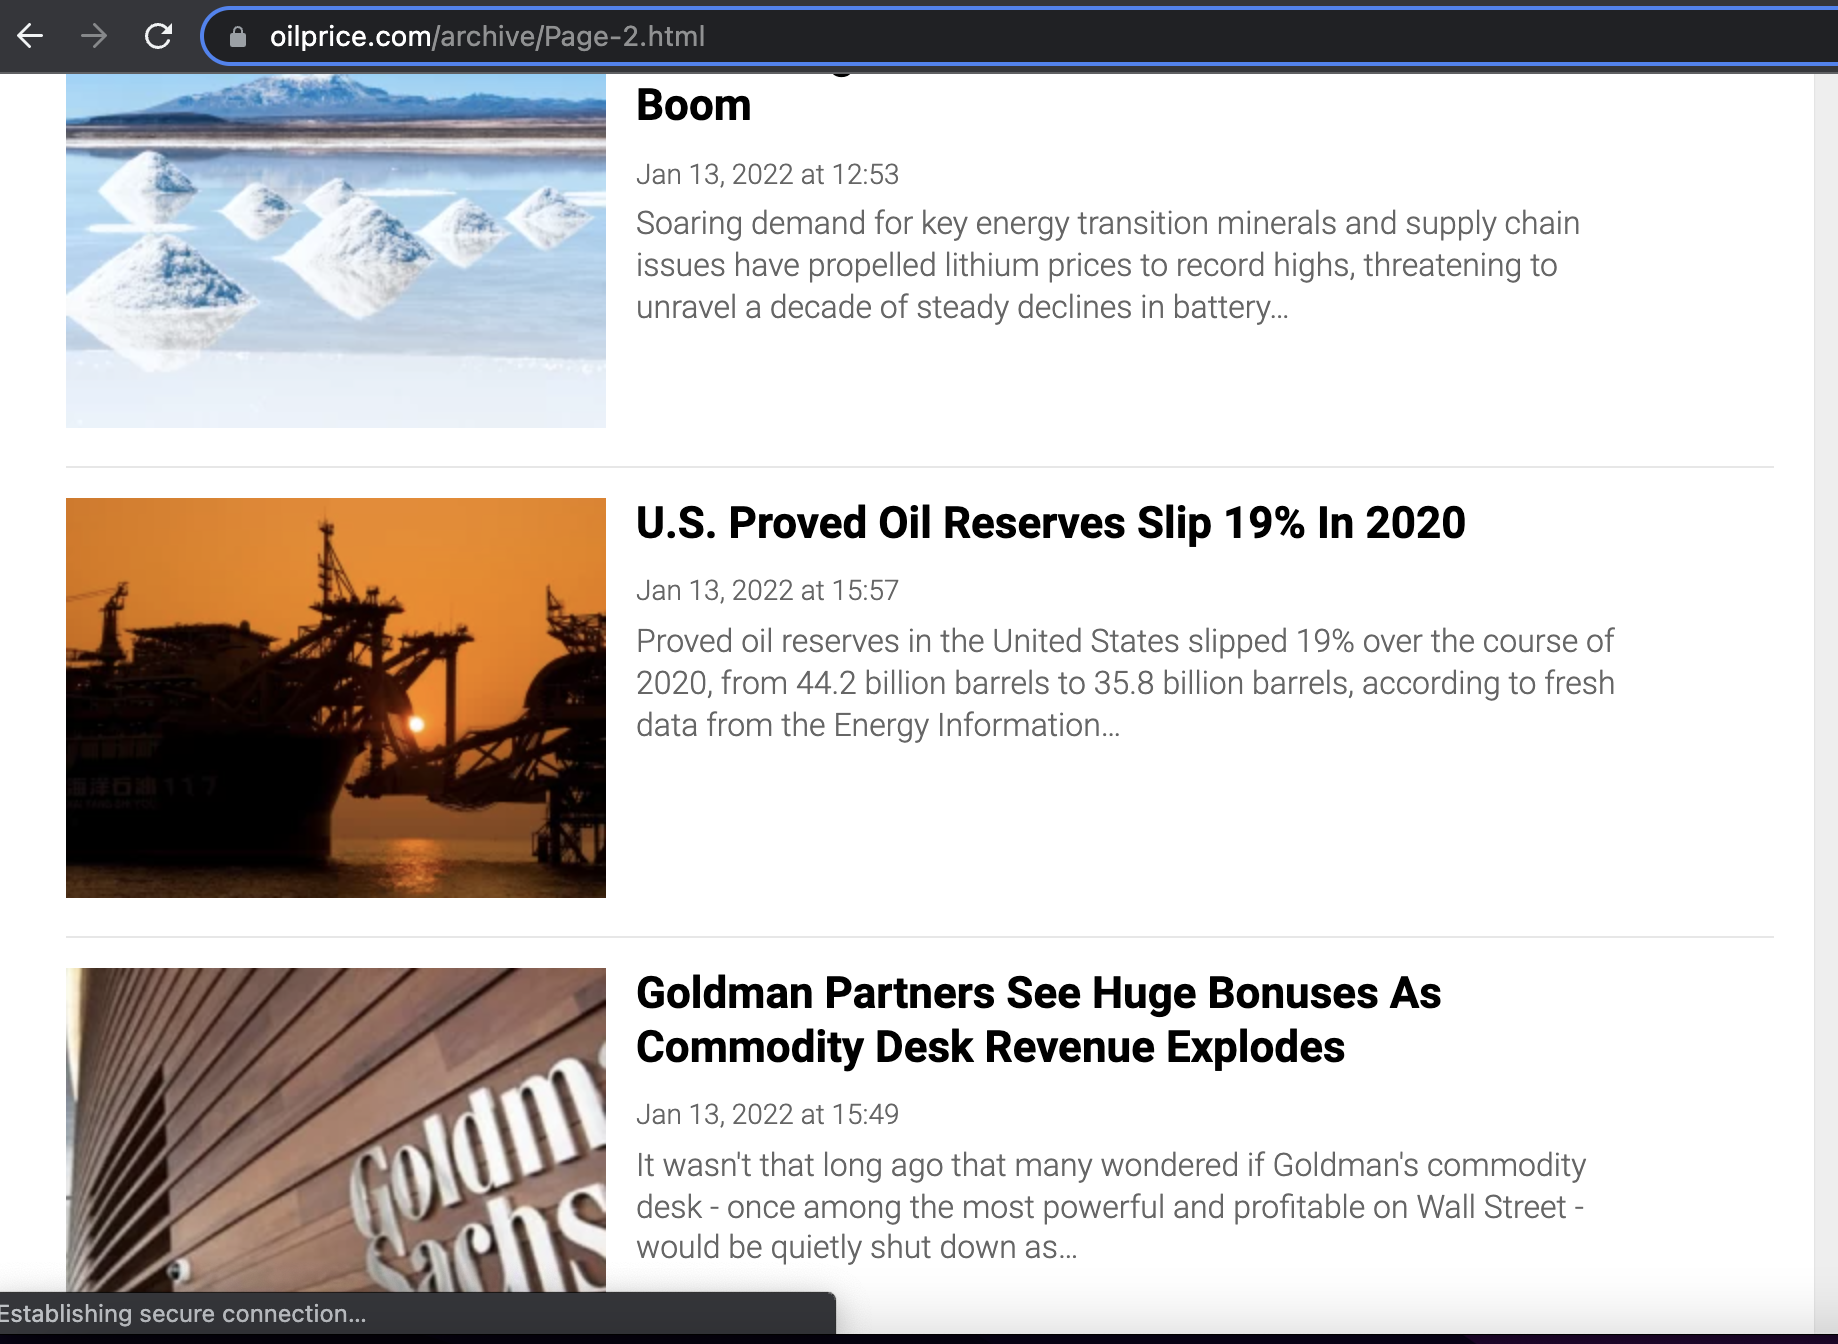

In [20]:
for i in range(1,4): #this loops through the page 1 to 4
  url = 'https://oilprice.com/Energy/Crude-Oil/Page-{}.html'.format(i)
  request = requests.get(url)
  soup = BeautifulSoup(request.text, "html.parser")
  for links in soup.find_all('div', {'class': 'categoryArticle'}):
      for info in links.find_all('a'):
        if info.get('href') not in url_list:
          url_list.append(info.get('href'))

In [21]:
for www in url_list:
    #accessing each url
    headlines.append(www.split("/")[-1].replace('-',' '))
    request = requests.get(www)
    soup = BeautifulSoup(request.text, "html.parser")
    #storing date and time of publication of the article
    for dates in soup.find_all('span', {'class': 'article_byline'}):
        date_time.append(dates.text.split('-')[-1])
    
    #storing the text of the news
    temp = []
    for news in soup.find_all('p'):
            temp.append(news.text)
    
    #to find the only the news article, a certain pattern was decoded in which
    # the article was extracted by identifying a certain last line 
    for last_sentence in reversed(temp):
        if last_sentence.split(" ")[0]=="By" and last_sentence.split(" ")[-1]=="Oilprice.com":
            break
        elif last_sentence.split(" ")[0]=="By":
            break
    
    #pruning non news related text from the scraped data to create the news text
    joined_text = ' '.join(temp[temp.index("More Info")+1:temp.index(last_sentence)])
    news_text.append(joined_text)

In [22]:
# saving news text along with the news headline in a dataframe      
news_df = pd.DataFrame({ 'Date' : date_time,
                         'Headline': headlines,
                         'News': news_text,
                       })

In [23]:
news_df.head()

,Date,Headline,News
0,"Jan 14, 2022, 12:13 PM CST",US Rig Count Jumps As Crude Rally Continues.html,The number of active drilling rigs in the Unit...
1,"Jan 16, 2022, 4:00 PM CST",Why The Bears Completely Missed The Mark On Oi...,"In 2020, as the coronavirus locked down countr..."
2,"Jan 14, 2022, 11:00 AM CST",China Set To Release Crude From Strategic Rese...,China has agreed with the United States to rel...
3,"Jan 14, 2022, 9:00 AM CST",Chinas Crude Imports Fell For The First Time I...,Crude oil imports into China fell by 5.4 perce...
4,"Jan 13, 2022, 5:00 PM CST",US Proved Oil Reserves Slip 19 In 2020.html,Proved oil reserves in the United States slipp...


In [24]:
# VADER to perform sentiment analysis on stored news articles
analyser = SentimentIntensityAnalyzer()

In [25]:
def comp_score(text):
   return analyser.polarity_scores(text)["compound"]  

In [26]:
news_df["sentiment"] = news_df["News"].apply(comp_score)

In [27]:
news_df

,Date,Headline,News,sentiment
0,"Jan 14, 2022, 12:13 PM CST",US Rig Count Jumps As Crude Rally Continues.html,The number of active drilling rigs in the Unit...,0.8238
1,"Jan 16, 2022, 4:00 PM CST",Why The Bears Completely Missed The Mark On Oi...,"In 2020, as the coronavirus locked down countr...",0.9790
2,"Jan 14, 2022, 11:00 AM CST",China Set To Release Crude From Strategic Rese...,China has agreed with the United States to rel...,-0.2732
3,"Jan 14, 2022, 9:00 AM CST",Chinas Crude Imports Fell For The First Time I...,Crude oil imports into China fell by 5.4 perce...,-0.9677
4,"Jan 13, 2022, 5:00 PM CST",US Proved Oil Reserves Slip 19 In 2020.html,Proved oil reserves in the United States slipp...,-0.9434
5,"Jan 13, 2022, 7:00 PM CST",80 Oil Is Too Enticing For US Drillers To Igno...,Despite multiple signals from the U.S. oil ind...,0.9880
6,"Jan 13, 2022, 1:00 PM CST",Libyas Once Great Oil Industry Is Facing A Ple...,There are still high hopes for Libya’s oil ind...,0.6611
7,"Jan 12, 2022, 1:00 PM CST",Chinese Oil Major CNOOC Targets Record High Pr...,China National Offshore Oil Corporation (CNOOC...,0.9673
8,"Jan 12, 2022, 11:00 AM CST",A Watershed Moment That Could Send Oil Prices ...,"Crude oil prices could reach $100 per barrel, ...",0.7759
9,"Jan 12, 2022, 9:38 AM CST",Oil Prices Inch Higher Despite Large Gasoline ...,Crude prices dipped slightly before jumping ag...,-0.4588


In [28]:
#from google.colab import files
#news_df.to_csv('Sentiment_Analysis.csv')
#files.download('Sentiment_Analysis.csv')